### M1M3 Bump test
* performed on 2/2/21, repeated ? times.
* we examine force accuracy and repeatability

In [1]:
#from openpyxl import load_workbook

from astropy.time import Time
from datetime import timedelta, datetime
from lsst_efd_client import EfdClient

import matplotlib.pyplot as plt
import matplotlib.dates as matdates
import scipy.io
import numpy as np
import pandas as pd
plt.jet()

from M1M3tools import * 

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters();

In [2]:
client = EfdClient('summit_efd')
csc_index = 1

In [17]:
#Petr: Yes, all passed from 2021-02-02 15:13:08.661 to 2021-02-02 16:28:29.325 UTC TAI (37sec offset from UTC!!)
start = Time('2021-02-02T15:13:00') #this is UTC
end = start+timedelta(minutes=2)
#end = Time(datetime.now())
#end = Time('2020-11-12T16:48:00') #this is UTC
#start = end - timedelta(minutes=15)

In [18]:
df = await client.select_time_series('lsst.sal.MTM1M3.forceActuatorData', '*', 
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, csc_index)

In [19]:
df

,forceMagnitude,fx,fy,fz,mx,my,mz,primaryCylinderForce0,primaryCylinderForce1,primaryCylinderForce10,...,zForce90,zForce91,zForce92,zForce93,zForce94,zForce95,zForce96,zForce97,zForce98,zForce99
2021-02-02 15:13:00.017000+00:00,0.586205,-0.043973,0.457302,-0.364113,-5.898955,4.688078,0.812831,0.065093,-0.062092,-0.031533,...,0.069729,-0.033022,-0.179278,0.079405,0.023222,-0.216673,0.161634,0.004304,0.059057,-0.009835
2021-02-02 15:13:00.035000+00:00,2.427901,-0.158081,-0.396155,-2.390141,7.304595,0.042906,0.141327,0.065093,0.000000,-0.157667,...,-0.098611,-0.043022,-0.140296,0.042117,0.087835,-0.295090,0.032327,-0.042020,0.114596,0.032710
2021-02-02 15:13:00.053000+00:00,0.956478,0.163403,0.833184,0.440402,-3.813954,2.839993,1.236750,0.065093,0.000000,-0.126133,...,0.003988,-0.099065,-0.155929,0.056067,-0.078751,-0.249460,-0.064654,-0.032591,0.072276,-0.111172
2021-02-02 15:13:00.071000+00:00,0.837799,0.472354,-0.576678,-0.382404,-0.515952,10.214000,1.495399,0.130186,0.124183,-0.126133,...,-0.032870,0.010001,-0.155829,0.079405,0.087835,-0.285117,0.064654,-0.134667,0.147215,0.055586
2021-02-02 15:13:00.089000+00:00,0.688711,-0.022396,0.456652,-0.515063,3.308257,3.547799,0.529363,0.162732,0.000000,-0.063067,...,-0.145097,0.043022,-0.132580,0.102744,-0.134280,-0.272275,-0.032327,-0.153524,-0.006182,-0.153717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-02 15:14:59.929000+00:00,212.649200,-0.423191,211.620789,-20.883945,92.560555,30.045792,753.219421,-0.227825,-0.031046,0.346867,...,-0.395129,-0.351356,-0.038782,-0.074576,0.078751,0.058472,-0.064654,-0.551577,-0.232710,-0.127418
2021-02-02 15:14:59.946000+00:00,213.343155,-0.356787,212.490540,-19.051170,86.874153,29.660952,753.403320,-0.260371,-0.124183,0.252267,...,-0.559480,-0.285313,0.148112,0.028168,0.073697,-0.105467,0.064654,-0.426340,-0.163953,0.127636
2021-02-02 15:14:59.965000+00:00,211.418625,-0.307653,210.376480,-20.963778,90.381676,30.022833,751.333801,-0.292918,-0.155229,0.252267,...,-0.522622,-0.213230,0.311657,-0.186709,-0.129226,0.091260,-0.096980,-0.342301,-0.206272,0.006629
2021-02-02 15:14:59.983000+00:00,212.497330,-0.562355,211.702179,-18.357166,82.001938,26.598429,752.739197,-0.325464,-0.124183,0.252267,...,-0.634849,-0.085104,0.109130,-0.018509,-0.143364,0.002869,-0.064654,-0.430644,-0.098714,-0.179798


In [20]:
F = assembleFinst(df)

In [21]:
F.shape

(6664, 156, 4)

### A general view

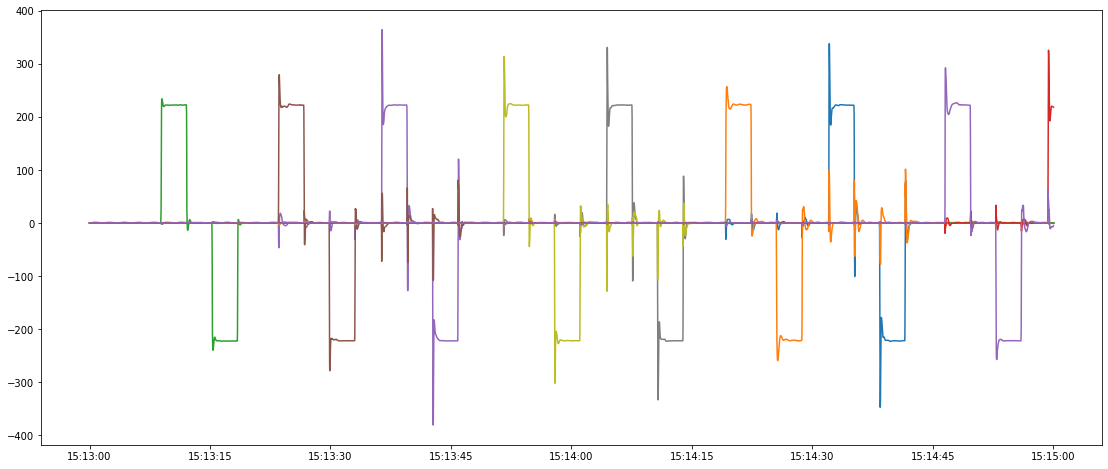

In [25]:
fig, ax = plt.subplots(figsize=(19,8))
for i in range(5):
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), F[:,i,1] - F[0,i,1])
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), F[:,i,2] - F[0,i,2])
    plt.plot(pd.to_datetime(df.private_sndStamp, unit='s'), F[:,i,3] - F[0,i,3])

### check a few actuators: those that reported error or warning.

In [ ]:
#cover the entire time
end = start+timedelta(minutes=78)
fa = np.array(FATABLE)

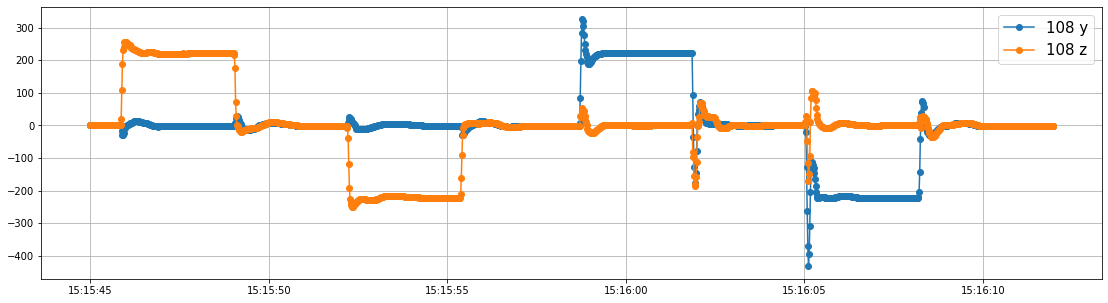

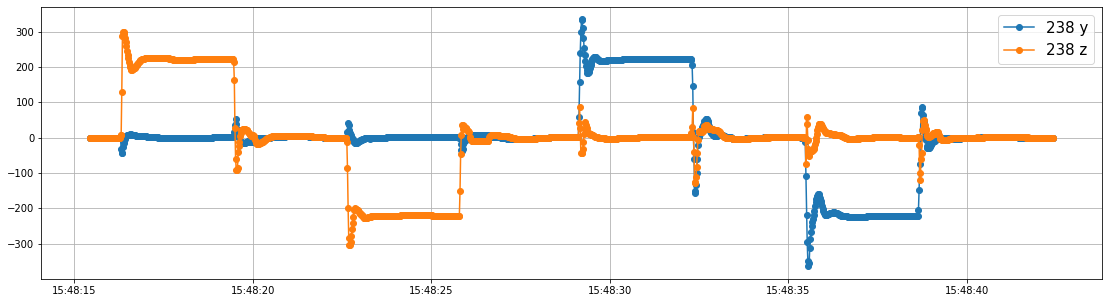

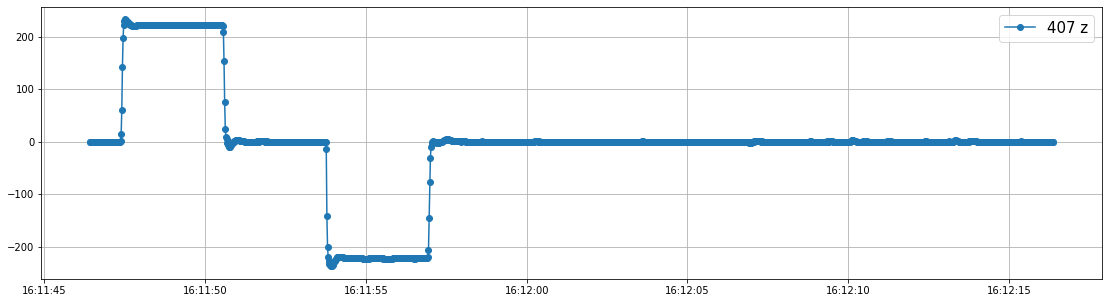

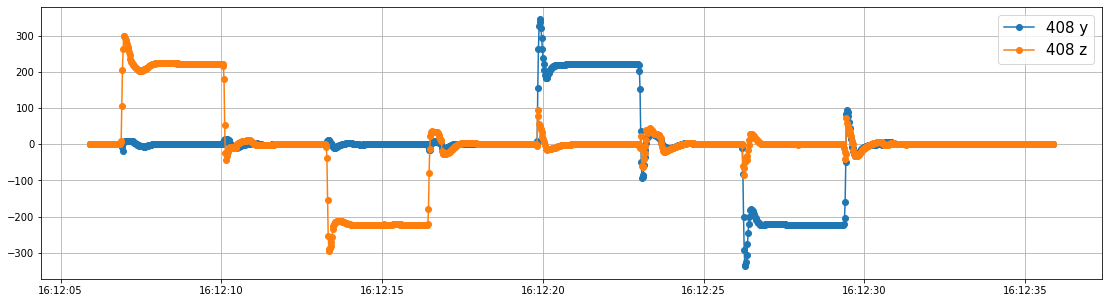

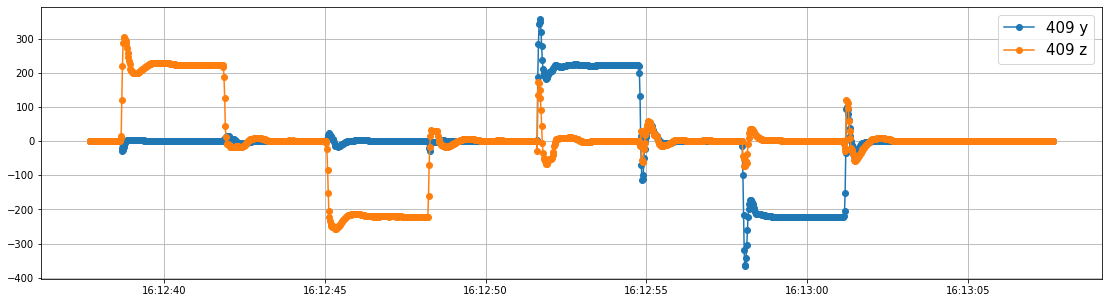

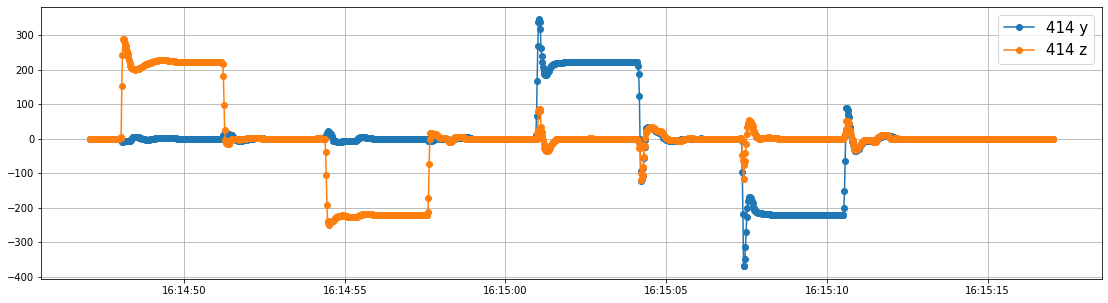

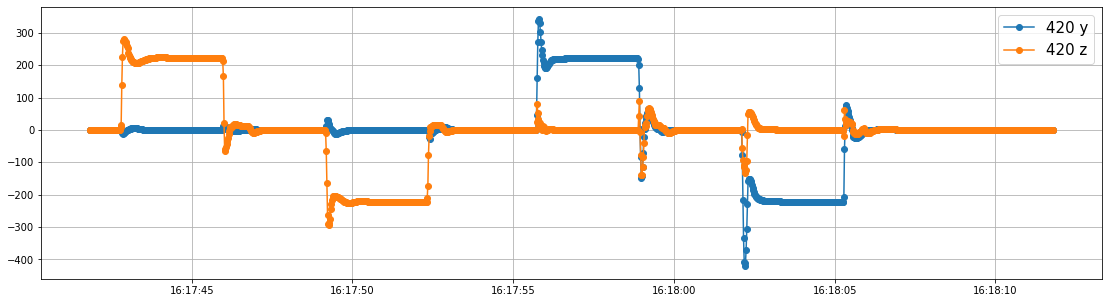

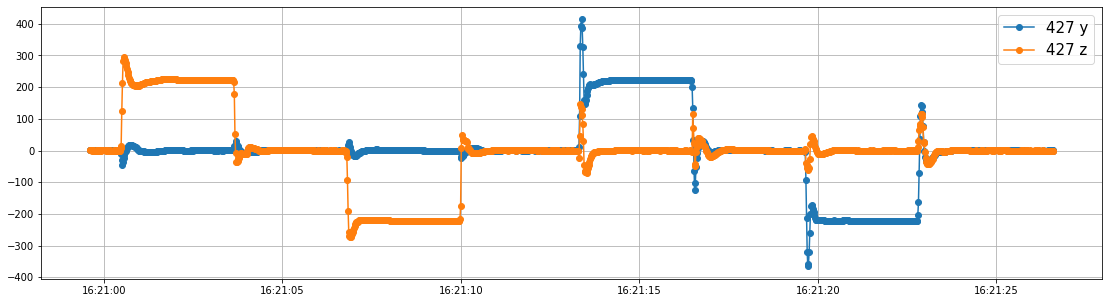

In [64]:
checkList = [108, 238, 407, 408, 409, 414, 420, 427]

plt.close()
for id in checkList:
    i = np.argmax(fa[:,FATABLE_ID] == str(id))
    ix = int(fa[i, FATABLE_XINDEX])
    iy = int(fa[i, FATABLE_YINDEX])
    iz = int(fa[i, FATABLE_ZINDEX])
    
    df = await client.select_time_series('lsst.sal.MTM1M3.forceActuatorData', 
                                     ['private_sndStamp','zForce%d'%iz, 'xForce%d'%ix, 'yForce%d'%iy],
                                     (start-timedelta(seconds=37)).tai, (end-timedelta(seconds=37)).tai, 
                                     csc_index)

    startIdx = np.argmax(np.array(df['zForce%d'%iz] -df['zForce%d'%iz][0])>50) - 50
    lenf = 1500

    fig, ax = plt.subplots(figsize=(19,5))
    if ix != -1:
        plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+lenf], unit='s'), 
                 df['xForce%d'%ix][startIdx:startIdx+lenf]-df['xForce%d'%ix][0],'-o', label='%d x'%id) 
    if iy != -1:
        plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+lenf], unit='s'), 
                 df['yForce%d'%iy][startIdx:startIdx+lenf]-df['yForce%d'%iy][0],'-o', label='%d y'%id) 
    if iz != -1:
        plt.plot(pd.to_datetime(df.private_sndStamp[startIdx:startIdx+lenf], unit='s'), 
                 df['zForce%d'%iz][startIdx:startIdx+lenf]-df['zForce%d'%iz][0],'-o', label='%d z'%id) 
    plt.legend(fontsize=15)
    plt.grid()
    plt.show()